group by https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html \\
hist https://chartio.com/learn/charts/histogram-complete-guide/ \\
sns examples https://medium.com/analytics-vidhya/plotting-with-seaborn-part-3-32857ca6fee \\
legend https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.legend.html

Источник данных https://www.kaggle.com/mpwolke/cusersmarildownloadstcellcsv

Описание колонок \\
'study_id', \\
'age_at_enrollment' \\ 
'sex' \\
'race_ethnicity' \\
'BMI' - индекс массы тела \\
'smoking_status' \\
'pack_years' \\
'inhalational_drugs' \\
'ivdu' - intravenous drug users \\
'hivrna' \\
'cd4' \\
's_cd14' - plasma soluble CD14  ( \\
'nadir_cd4' \\
'dm' - Dextromethorphan \\
'htn' - Hypertension \\
'anemia' \\
'chronic_heart_disease' \\
'tb' - Tuberculosis \\
'pcp' -  Pneumocystis carinii pneumonia \\
'pneu' - Pneumonia \\
'cd4_cd8_ratio' \\
'ART_use' - Antiretroviral Therapy \\
'post_FEV1' - postoperative Forced expiratory volume \\
'FEV1_percent_pred' - Forced expiratory volume \\
'post_FVC' Post-Bronchodilator Forced Vital Capacity (FVC) \\
'FVC_percent_pred' \\
'dlco_percent_pred' - Исследование способности диффузии газов в легких \\
'emphysema_severity'

Emphysema, or pulmonary emphysema, is a lower respiratory tract disease,[5] characterised by air-filled spaces (pneumatoses) in the lung, that can vary in size and may be very large. The spaces are caused by the breakdown of the walls of the alveoli and they replace the spongy lung parenchyma. This reduces the total alveolar surface available for gas exchange leading to a reduction in oxygen supply for the blood.[6] Emphysema usually affects the middle aged or older population because it takes time to develop with the effects of smoking, and other risk factors. Alpha-1 antitrypsin deficiency is a genetic risk factor that may lead to the condition presenting earlier.[7]

 Because emphysema develops earlier in HIV+ patients, the association between HIV infection and emphysema may reflect an increased susceptibility to tobacco damage. The increased susceptibility may be due to HIV decreasing the lung’s ability to cope with the injury by cigarette smoking. 

Plasma sCD14 is a biomarker associated with impaired neurocognitive testing in attention and learning domains in HIV-infected individuals with advanced disease, suggesting involvement of cortical and limbic pathways by inflammatory processes in the cART era. Plasma sCD14 is a potential biomarker to monitor HAND progression and therapeutic responses.

cd4_cd8_ratio The CD4+/CD8+ ratio is the ratio of T helper cells (with the surface marker CD4) to cytotoxic T cells (with the surface marker CD8). Both CD4+ and CD8+ T cells contain several subsets.[1]

The CD4+/CD8+ ratio in the peripheral blood of healthy adults and mice is about 2:1, and an altered ratio can indicate diseases relating to immunodeficiency or autoimmunity.[2] An inverted CD4+/CD8+ ratio (namely, less than 1/1) indicates an impaired immune system.[3][4][5]

Obesity and dysregulated lipid metabolism in the liver leads to loss of CD4+, but not CD8+ cells, contributing to the induction of liver cancer.[6] Regulatory CD4+ cells decline with expanding visceral fat, whereas CD8+ T-cells increase.[7]
https://en.wikipedia.org/wiki/CD4%2B/CD8%2B_ratio

Description


Цель - 

## Загрузка библиотек и датасета

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [ ]:
df = pd.read_csv('TCell.csv', sep=';')

## Checking the data

In [ ]:
df.head(10)

,study_id,age_at_enrollment,sex,race_ethnicity,BMI,smoking_status,pack_years,inhalational_drugs,ivdu,hivrna,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,1,52,1,White,"31,08838463",current smoker,"12,75",1.0,0.0,48.0,...,0,0,"0,539454818",1,"4,120999813","98,07405853","5,234000206","95,8157196","56,68161392",0.0
1,2,54,0,Black,"26,70339775",former smoker,15,1.0,0.0,166.0,...,0,0,"0,640530765",1,"1,835000038","79,41847992","2,441999912","83,96646881","70,34482574",0.0
2,3,49,1,Black,"28,09877777",never smoker,0,1.0,0.0,48.0,...,0,0,"0,100649349",1,"2,957000017","81,4342041","3,683000088","81,26852417","38,7721138",0.0
3,4,46,0,Black,"35,94466019",current smoker,12,1.0,0.0,199.0,...,0,0,"1,282485843",2,"1,996999979","89,97170258","2,309999943","84,46355438","86,62697601",1.0
4,5,47,1,Black,"24,1571846",current smoker,"12,5",0.0,0.0,268.0,...,0,0,"0,877697825",1,"3,773000002","102,8942871","4,59499979","100,7662354","50,12286758",1.0
5,6,38,1,Black,"28,93061256",current smoker,"6,800000191",1.0,0.0,117227.0,...,0,0,"0,095435686",1,"3,230000019","92,55957031","3,726000071","87,8432312","58,17596817",0.0
6,7,36,1,Black,"25,24081612",never smoker,0,0.0,0.0,1003.0,...,0,0,"0,036410924",1,"2,875","80,89046478","3,530999899","82,25878906","48,69818115",0.0
7,8,54,1,Black,"24,5370388",current smoker,15,0.0,0.0,48.0,...,0,0,"0,280829608",1,"3,135999918","93,37130737","3,575999975","84,16017151","44,11812592",1.0
8,9,65,1,White,"30,61224747",former smoker,24,1.0,0.0,70.0,...,0,0,"0,254308522",1,"2,90199995","99,47930145","3,598999977","91,51650238","56,13323975",0.0
9,10,39,1,Black,"25,71166229",current smoker,28,1.0,0.0,48.0,...,0,0,"0,886345029",1,"3,345999956","110,4618301","4,227000237","115,2913895","67,79264832",0.0


In [ ]:
print(df.shape)

(190, 28)


In [ ]:
col = df.columns
col

Index(['study_id', 'age_at_enrollment', 'sex', 'race_ethnicity', 'BMI',
       'smoking_status', 'pack_years', 'inhalational_drugs', 'ivdu', 'hivrna',
       'cd4', 's_cd14', 'nadir_cd4', 'dm', 'htn', 'anemia',
       'chronic_heart_disease', 'tb', 'pcp', 'pneu', 'cd4_cd8_ratio',
       'ART_use', 'post_FEV1', 'FEV1_percent_pred', 'post_FVC',
       'FVC_percent_pred', 'dlco_percent_pred', 'emphysema_severity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_id               190 non-null    int64  
 1   age_at_enrollment      190 non-null    int64  
 2   sex                    190 non-null    int64  
 3   race_ethnicity         190 non-null    object 
 4   BMI                    183 non-null    object 
 5   smoking_status         189 non-null    object 
 6   pack_years             186 non-null    object 
 7   inhalational_drugs     187 non-null    float64
 8   ivdu                   186 non-null    float64
 9   hivrna                 189 non-null    float64
 10  cd4                    189 non-null    float64
 11  s_cd14                 181 non-null    object 
 12  nadir_cd4              166 non-null    float64
 13  dm                     190 non-null    int64  
 14  htn                    190 non-null    int64  
 15  anemia

In [ ]:
df.isnull().sum()

study_id                  0
age_at_enrollment         0
sex                       0
race_ethnicity            0
BMI                       7
smoking_status            1
pack_years                4
inhalational_drugs        3
ivdu                      4
hivrna                    1
cd4                       1
s_cd14                    9
nadir_cd4                24
dm                        0
htn                       0
anemia                    0
chronic_heart_disease     0
tb                        0
pcp                       0
pneu                      0
cd4_cd8_ratio             0
ART_use                   0
post_FEV1                60
FEV1_percent_pred        13
post_FVC                 60
FVC_percent_pred         13
dlco_percent_pred         9
emphysema_severity       26
dtype: int64

## Data cleaning

Заменим разделитель в числах с запятой на точку


In [ ]:
df['pack_years'] = pd.to_numeric(df['pack_years'].str.replace(',', '.'))
df['BMI'] = pd.to_numeric(df['BMI'].str.replace(',', '.'))
df['s_cd14'] = pd.to_numeric(df['s_cd14'].str.replace(',', '.'))
df['post_FEV1'] = pd.to_numeric(df['post_FEV1'].str.replace(',', '.'))
df['FEV1_percent_pred'] = pd.to_numeric(df['FEV1_percent_pred'].str.replace(',', '.'))
df['post_FVC'] = pd.to_numeric(df['post_FVC'].str.replace(',', '.'))
df['FVC_percent_pred'] = pd.to_numeric(df['FVC_percent_pred'].str.replace(',', '.'))
df['dlco_percent_pred'] = pd.to_numeric(df['dlco_percent_pred'].str.replace(',', '.'))
df['cd4_cd8_ratio'] = pd.to_numeric(df['cd4_cd8_ratio'].str.replace(',', '.'))
df['ART_use'] = df['ART_use'].replace([1,2], [0,1]).astype('bool')

# здесь не было NaN
#df['sex'] = df['sex'].astype('bool')
#df['inhalational_drugs'] = df['inhalational_drugs'].astype('bool')
#df['ivdu'] = df['ivdu'].astype('bool')
#df['dm'] = df['dm'].astype('bool')
#df['htn'] = df['htn'].astype('bool')
#df['chronic_heart_disease'] = df['chronic_heart_disease'].astype('bool')
#df['tb'] = df['tb'].astype('bool')
#df['pcp'] = df['pcp'].astype('bool')
#df['pneu'] = df['pneu'].astype('bool')
#df['anemia'] = df['anemia'].astype('bool')

#df['emphysema_severity'] = df['emphysema_severity'].astype('int')

In [ ]:
df = df[((df['tb']!=1) & (df['pcp']!=1) & (df['pneu']!=1))]

This allowes to leave NaN

In [ ]:
df['emphysema_severity'] = df['emphysema_severity'].map({0.0: '0%', 1.0: '1-10%', 2.0:'10-25%', 3.0:'25-50%', 4.0:'50-75%', 5.0:'>75%'})
df['pneu'] = df['chronic_heart_disease'].map({1: 'Есть', 0: 'Нет'})

df['smoking_status'] = df['smoking_status'].map({'current smoker': 'Курит', 'former smoker': 'Курил', 'never smoker':'Никогда не курил'})
df['inhalational_drugs'] = df['inhalational_drugs'].map({1: 'Проводится', 0: 'Не проводится'})
df['ivdu'] = df['ivdu'].map({1: 'Проводится', 0: 'Не проводится'})
df['dm'] = df['dm'].map({1: 'Проводится', 0: 'Не проводится'})
df['ART_use'] = df['ART_use'].map({True: 'Проводится', False: 'Не проводится'})
df['anemia'] = df['anemia'].map({1: 'Есть', 0: 'Нет'})
df['chronic_heart_disease'] = df['chronic_heart_disease'].map({1: 'Есть', 0: 'Нет'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df

,study_id,age_at_enrollment,sex,race_ethnicity,BMI,smoking_status,pack_years,inhalational_drugs,ivdu,hivrna,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,1,52,1,White,31.088385,Курит,12.75,Проводится,Не проводится,48.0,...,0,Нет,0.539455,Не проводится,4.121,98.074059,5.234,95.815720,56.681614,0%
1,2,54,0,Black,26.703398,Курил,15.00,Проводится,Не проводится,166.0,...,0,Нет,0.640531,Не проводится,1.835,79.418480,2.442,83.966469,70.344826,0%
2,3,49,1,Black,28.098778,Никогда не курил,0.00,Проводится,Не проводится,48.0,...,0,Нет,0.100649,Не проводится,2.957,81.434204,3.683,81.268524,38.772114,0%
3,4,46,0,Black,35.944660,Курит,12.00,Проводится,Не проводится,199.0,...,0,Нет,1.282486,Проводится,1.997,89.971703,2.310,84.463554,86.626976,1-10%
4,5,47,1,Black,24.157185,Курит,12.50,Не проводится,Не проводится,268.0,...,0,Нет,0.877698,Не проводится,3.773,102.894287,4.595,100.766235,50.122868,1-10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,181,56,1,White,21.328979,Курил,46.25,Проводится,Не проводится,20.0,...,0,Нет,0.923810,Проводится,NaN,114.689667,NaN,103.348686,103.343552,1-10%
181,182,43,1,Black,24.381140,Никогда не курил,0.00,Проводится,Не проводится,95.0,...,0,Нет,0.432418,Проводится,NaN,107.397331,NaN,98.048012,58.278053,0%
182,183,59,1,Black,29.157047,Курил,3.00,Проводится,Не проводится,20.0,...,0,Нет,0.455408,Проводится,NaN,83.877396,NaN,85.658020,57.252861,0%
185,186,55,1,Black,24.032654,Никогда не курил,0.00,Не проводится,Не проводится,48.0,...,0,Нет,0.748120,Не проводится,2.263,73.055710,3.554,90.375343,62.305233,0%


In [ ]:
df_cat = df.copy()
df_cat['pack_years'] = df_cat['pack_years'].map(lambda x:'Немоного (<20)' if x<20 else ('Умеренно' if (x>=20 and x<40) else (np.nan if x!=x else 'Много (>40)')))
df_cat['BMI'] = df_cat['BMI'].map(lambda x:'Дистрофия' if x<18.5 else ('Норма' if (x>=18.5 and x<24.9) else (np.nan if x!=x else 'Ожирение')))
df_cat['emphysema_severity'] = df_cat['emphysema_severity'].map(lambda x:'Нет' if x=='0%' else (np.nan if x!=x else 'Есть'))
df_cat['cd4'] = df_cat['cd4'].apply(lambda x:'Низкий' if x<500 else ('Нормальный' if (x>=500 and x<1400) else (np.nan if x!=x else 'Высокий')))
df_cat['cd4_cd8_ratio'] = df_cat['cd4_cd8_ratio'].apply(lambda x:'Низкий' if x<0.4 else ('Нормальный' if (x>=0.4 and x<1.0) else (np.nan if x!=x else 'Высокий')))
df_cat['s_cd14'] = df_cat['s_cd14'].apply(lambda x:'Низкий' if x<200 else ('Нормальный' if (x>=200 and x<1500) else (np.nan if x!=x else 'Высокий')))
df_cat['nadir_cd4'] = df_cat['nadir_cd4'].apply(lambda x:'Низкий' if x<190 else ('Нормальный' if (x>=190 and x<400) else (np.nan if x!=x else 'Высокий')))

In [ ]:
df_cat

,study_id,age_at_enrollment,sex,race_ethnicity,BMI,smoking_status,pack_years,inhalational_drugs,ivdu,hivrna,...,pcp,pneu,cd4_cd8_ratio,ART_use,post_FEV1,FEV1_percent_pred,post_FVC,FVC_percent_pred,dlco_percent_pred,emphysema_severity
0,1,52,1,White,Ожирение,Курит,Немоного (<20),Проводится,Не проводится,48.0,...,0,Нет,Нормальный,Не проводится,4.121,98.074059,5.234,95.815720,56.681614,Нет
1,2,54,0,Black,Ожирение,Курил,Немоного (<20),Проводится,Не проводится,166.0,...,0,Нет,Нормальный,Не проводится,1.835,79.418480,2.442,83.966469,70.344826,Нет
2,3,49,1,Black,Ожирение,Никогда не курил,Немоного (<20),Проводится,Не проводится,48.0,...,0,Нет,Низкий,Не проводится,2.957,81.434204,3.683,81.268524,38.772114,Нет
3,4,46,0,Black,Ожирение,Курит,Немоного (<20),Проводится,Не проводится,199.0,...,0,Нет,Высокий,Проводится,1.997,89.971703,2.310,84.463554,86.626976,Есть
4,5,47,1,Black,Норма,Курит,Немоного (<20),Не проводится,Не проводится,268.0,...,0,Нет,Нормальный,Не проводится,3.773,102.894287,4.595,100.766235,50.122868,Есть
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,181,56,1,White,Норма,Курил,Много (>40),Проводится,Не проводится,20.0,...,0,Нет,Нормальный,Проводится,NaN,114.689667,NaN,103.348686,103.343552,Есть
181,182,43,1,Black,Норма,Никогда не курил,Немоного (<20),Проводится,Не проводится,95.0,...,0,Нет,Нормальный,Проводится,NaN,107.397331,NaN,98.048012,58.278053,Нет
182,183,59,1,Black,Ожирение,Курил,Немоного (<20),Проводится,Не проводится,20.0,...,0,Нет,Нормальный,Проводится,NaN,83.877396,NaN,85.658020,57.252861,Нет
185,186,55,1,Black,Норма,Никогда не курил,Немоного (<20),Не проводится,Не проводится,48.0,...,0,Нет,Нормальный,Не проводится,2.263,73.055710,3.554,90.375343,62.305233,Нет


In [ ]:
df.shape

(147, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 189
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_id               147 non-null    int64  
 1   age_at_enrollment      147 non-null    int64  
 2   sex                    147 non-null    int64  
 3   race_ethnicity         147 non-null    object 
 4   BMI                    143 non-null    float64
 5   smoking_status         147 non-null    object 
 6   pack_years             144 non-null    float64
 7   inhalational_drugs     145 non-null    object 
 8   ivdu                   144 non-null    object 
 9   hivrna                 146 non-null    float64
 10  cd4                    146 non-null    float64
 11  s_cd14                 141 non-null    float64
 12  nadir_cd4              126 non-null    float64
 13  dm                     147 non-null    object 
 14  htn                    147 non-null    int64  
 15  anemia

In [ ]:
df.isnull().sum()

study_id                  0
age_at_enrollment         0
sex                       0
race_ethnicity            0
BMI                       4
smoking_status            0
pack_years                3
inhalational_drugs        2
ivdu                      3
hivrna                    1
cd4                       1
s_cd14                    6
nadir_cd4                21
dm                        0
htn                       0
anemia                    0
chronic_heart_disease     0
tb                        0
pcp                       0
pneu                      0
cd4_cd8_ratio             0
ART_use                   0
post_FEV1                47
FEV1_percent_pred         7
post_FVC                 47
FVC_percent_pred          7
dlco_percent_pred         5
emphysema_severity       20
dtype: int64

In [ ]:
lung_dis = ['tb','pcp','pneu','emphysema_severity']
other_dis = ['htn', 'anemia', 'chronic_heart_disease']
immune_lvl = ['cd4', 's_cd14', 'nadir_cd4', 'cd4_cd8_ratio', 'hivrna']
medicine = ['ART_use', 'inhalational_drugs', 'ivdu', 'dm']
smoking = ['smoking_status', 'pack_years']
spir_data = ['post_FEV1', 'FEV1_percent_pred', 'post_FVC', 'FVC_percent_pred', 'dlco_percent_pred']
general_inf = ['sex', 'race_ethnicity', 'BMI']

In [ ]:
# Словарь
dic_names = {'BMI':'Индекс массы тела',
             'hivrna':'РНК ВИЧ',

             'cd4':'CD4',
             's_cd14':'sCD14',
             'nadir_cd4':'надир CD4',
             'cd4_cd8_ratio':'CD4/CD8',

             'age_at_enrollment':'Возраст вступления в программу',
         
             'inhalational_drugs':'Инголяционные лекарства',
             'ivdu':'Внутривенные лекарства',
             'dm':'Декстрометорфан',
             
             'htn':'Гипертония',
             'anemia':'Анемия',
             'chronic_heart_disease':'Хронические заболевания сердца',
             
             'tb':'Туберкулез',
             'pcp':'Пневмоцистная пневмония',
             'pneu':'Бактериальная пневмония',
             'emphysema_severity':'Стадия эмфиземы',

             'post_FEV1':'ОФВ1 после приема бронхолитика',
             'FEV1_percent_pred':'Прогнозируемое значение ОФВ1, %',
             'post_FVC':'ФЖЕЛ после приема бронхолитика',
             'FVC_percent_pred':'Прогнозируемое значение ФЖЕЛ, %',
             'dlco_percent_pred':'Прогнозируемое значение DLCO, %',

             'smoking_status':'Статус курильщика',    
             'pack_years':'Количество выкуривыемых пачек в год',

             'ART_use':'Антиретровирусная терапия',

             'sex':'пол',
             'race_ethnicity':'Рассовая пренадлежность',

             'emphysema_severity_bool':'Эмфизема'
}
# расшифровки аббревиатур https://www.medtran.ru/rus/terms/glossary/spirometryterms_eng.htm

## Статистика

### Эмфизема

##### Распределение больных эмфиземой по выборке

In [ ]:
df_gr_emph = df.copy()
df_gr_emph['emphysema_severity'] = df_gr_emph['emphysema_severity'].apply(lambda x:'Нет' if x=='0%' else 'Есть')
x_names = ['cd4', 's_cd14', 'nadir_cd4', 'cd4_cd8_ratio', 'hivrna', 'BMI', 'pack_years']

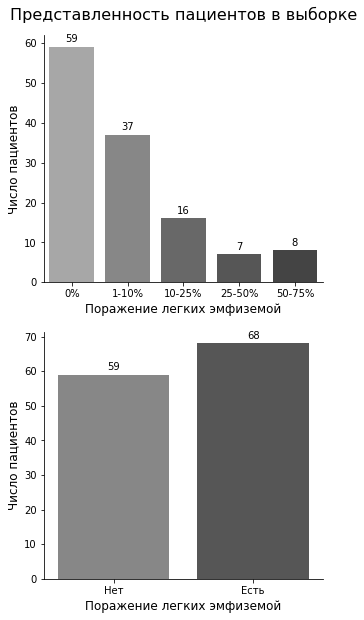

In [ ]:
fig = plt.figure(figsize=(5, 5*2))
ax1 = fig.add_subplot(211)
plot1 = (df.groupby('emphysema_severity')
    .size()
    .rename('Число пациентов')
    .reset_index()
    .pipe((sns.barplot,'data'), x='emphysema_severity', y='Число пациентов', palette='Greys_d'))
ax1.set_xlabel('Поражение легких эмфиземой', fontsize=12)
ax1.set_ylabel('Число пациентов',fontsize=12)
ax1.set_title('Представленность пациентов в выборке',fontsize=16, pad=15)
for bar in plot1.patches:
    plot1.annotate('{}'.format(round(bar.get_height())),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points') 
                   
ax2 = fig.add_subplot(212)
plot2 = (df_cat.groupby('emphysema_severity')
    .size()
    .rename('Число пациентов')
    .reset_index()
    .pipe((sns.barplot,'data'), x='emphysema_severity', y='Число пациентов', order=['Нет', 'Есть'], palette='Greys_d'))
ax2.set_xlabel('Поражение легких эмфиземой', fontsize=12)
ax2.set_ylabel('Число пациентов',fontsize=12)
for bar in plot2.patches:
    plot2.annotate('{}'.format(round(bar.get_height())),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points') 

sns.despine()

In [ ]:
df_gr_emph[x_names].describe().T

,count,mean,std,min,25%,50%,75%,max
cd4,146.0,515.287671,308.486248,28.000000,320.75000,446.50000,646.000000,1962.000000
s_cd14,141.0,1702.368299,454.509319,50.000000,1387.73999,1631.22998,1962.699951,3045.070068
nadir_cd4,126.0,200.761905,177.728666,3.000000,70.00000,162.00000,286.000000,1235.000000
cd4_cd8_ratio,147.0,0.664679,0.473824,0.036411,0.30795,0.53783,0.889093,2.714597
hivrna,146.0,8787.164384,37980.327566,20.000000,48.00000,48.00000,107.000000,341000.000000
BMI,143.0,26.998103,5.003469,17.530865,23.81983,26.23457,29.829196,53.159142
pack_years,144.0,23.189583,22.303934,0.000000,5.81250,17.75000,36.250000,118.800003


In [ ]:
em_no = df_gr_emph[df_gr_emph['emphysema_severity']=='Нет']
em_yes = df_gr_emph[df_gr_emph['emphysema_severity']=='Есть']

In [ ]:
em_no[x_names].describe()

,cd4,s_cd14,nadir_cd4,cd4_cd8_ratio,hivrna,BMI,pack_years
count,59.000000,57.000000,49.000000,59.000000,59.000000,59.000000,57.000000
mean,570.203390,1703.071402,207.122449,0.691771,7132.983051,27.990796,15.867544
std,358.633892,509.154688,156.244551,0.480216,26769.898812,4.565111,23.761117
min,28.000000,50.000000,5.000000,0.036411,20.000000,19.777908,0.000000
25%,324.500000,1352.040039,73.000000,0.374849,48.000000,24.335980,0.000000
50%,470.000000,1635.709961,203.000000,0.590361,48.000000,27.104521,9.000000
75%,751.500000,2076.590088,291.000000,0.926424,94.500000,30.850316,20.500000
max,1962.000000,2882.459961,593.000000,2.714597,152264.000000,38.973927,118.800003


In [ ]:
em_yes[x_names].describe()

,cd4,s_cd14,nadir_cd4,cd4_cd8_ratio,hivrna,BMI,pack_years
count,87.000000,84.000000,77.000000,88.000000,87.000000,84.000000,87.000000
mean,478.045977,1701.891193,196.714286,0.646514,9908.965517,26.300854,27.986782
std,265.020706,416.578402,191.028990,0.471373,44109.792352,5.203353,20.018145
min,43.000000,900.320007,3.000000,0.058180,20.000000,17.530865,0.000000
25%,304.000000,1412.649964,62.000000,0.290668,48.000000,23.340265,12.550000
50%,446.000000,1631.159973,144.000000,0.485460,48.000000,25.403536,27.000000
75%,612.500000,1929.762512,265.000000,0.878520,192.000000,29.001623,42.000000
max,1479.000000,3045.070068,1235.000000,2.154229,341000.000000,53.159142,88.000000


In [ ]:
em_no[x_names].median()

cd4               470.000000
s_cd14           1635.709961
nadir_cd4         203.000000
cd4_cd8_ratio       0.590361
hivrna             48.000000
BMI                27.104521
pack_years          9.000000
dtype: float64

In [ ]:
em_yes[x_names].median()

cd4               446.000000
s_cd14           1631.159973
nadir_cd4         144.000000
cd4_cd8_ratio       0.485460
hivrna             48.000000
BMI                25.403536
pack_years         27.000000
dtype: float64

Доверительный интервал

In [ ]:
import numpy as np
import scipy.stats

data = df_gr_emph[(df_gr_emph['BMI']==df_gr_emph['BMI'])]
data = data[data['emphysema_severity']=='Нет']['BMI']

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    print(a)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(data=data)

[31.08838463 26.70339775 28.09877777 28.93061256 25.24081612 30.61224747
 25.71166229 21.70862007 26.71020317 29.74433899 35.39792252 33.0449791
 31.14197731 26.26215363 23.79470444 30.07116699 19.77790833 21.52506065
 31.51878738 32.20663452 28.88889122 22.01877785 38.12355804 24.80334282
 24.29082108 26.70339775 28.84736824 24.16383362 36.64359665 24.84428978
 22.78726196 25.7706356  24.39717293 34.50617599 27.93277359 29.86054993
 32.51027298 27.23155594 28.03870583 26.31734276 22.00691986 27.03063774
 38.97392654 29.79784203 25.4492321  23.3871994  27.1045208  33.18809509
 36.50518799 23.28254128 23.03515625 24.2507267  29.15704727 37.30160904
 31.6609993  24.38113976 29.15704727 24.03265381 23.78378296]


(27.990795685423734, 26.801121180729673, 29.180470190117795)

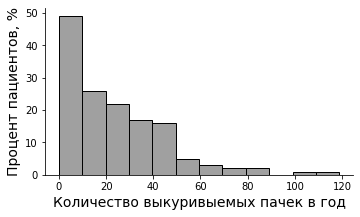

In [ ]:
x_names = ['pack_years']

fig = plt.figure(figsize=(5*2.3, 5*3))
for i,x in enumerate(x_names):
  ax = fig.add_subplot(4, 2, i+1)
  hist = sns.histplot(data=df_gr_emph, x=x, bins=round(len(df[x])**0.5), color='#808080')
  ax.set_xlabel(dic_names[x], fontsize=14)
  ax.set_ylabel('Процент пациентов, %', fontsize=14)

#ax = fig.add_subplot(3, 4, 7)

#fig.text(0.08, 0.5, 'Процент пациентов, %', ha='center', va='center', rotation='vertical',fontsize=16)
plt.subplots_adjust(wspace=0.08, hspace=0.3)
sns.despine()


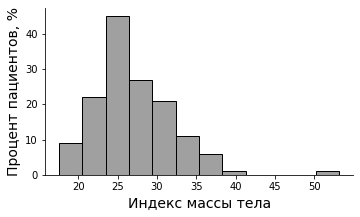

In [ ]:
x_names = ['BMI']

fig = plt.figure(figsize=(5*2.3, 5*3))
for i,x in enumerate(x_names):
  ax = fig.add_subplot(4, 2, i+1)
  hist = sns.histplot(data=df_gr_emph, x=x, bins=round(len(df[x])**0.5), color='#808080')
  ax.set_xlabel(dic_names[x], fontsize=14)
  ax.set_ylabel('Процент пациентов, %', fontsize=14)

#ax = fig.add_subplot(3, 4, 7)

#fig.text(0.08, 0.5, 'Процент пациентов, %', ha='center', va='center', rotation='vertical',fontsize=16)
plt.subplots_adjust(wspace=0.08, hspace=0.3)
sns.despine()

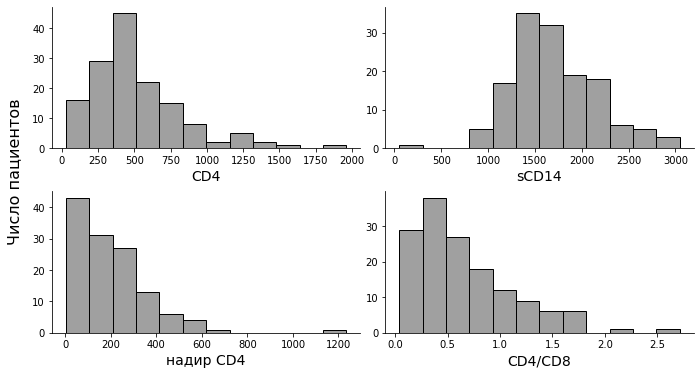

In [ ]:
x_names = ['cd4', 's_cd14', 'nadir_cd4', 'cd4_cd8_ratio']

fig = plt.figure(figsize=(5*2.3, 6))
for i,x in enumerate(x_names):
  ax = fig.add_subplot(2, 2, i+1)
  hist = sns.histplot(data=df_gr_emph, x=x, bins=round(len(df[x])**0.5), color='#808080')
  ax.set_xlabel(dic_names[x], fontsize=14)
  ax.set_ylabel('', fontsize=14)

#ax = fig.add_subplot(3, 4, 7)

fig.text(0.08, 0.5, 'Число пациентов', ha='center', va='center', rotation='vertical',fontsize=16)
plt.subplots_adjust(wspace=0.08, hspace=0.3)
sns.despine()

In [ ]:
df_gr_emph[df_gr_emph['hivrna']<50]['hivrna'].count()  # вирус подавлен

94

In [ ]:
df_gr_emph[df_gr_emph['hivrna']>50]['hivrna'].count() # вирус активен

52

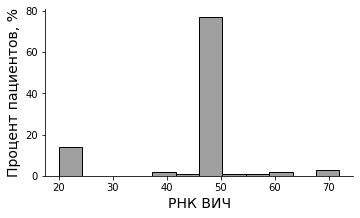

In [ ]:
x_names = ['hivrna']

rna_cat = df_gr_emph[df_gr_emph['hivrna']<75] # 75- детектируемый порог

fig = plt.figure(figsize=(5*2.3, 5*3))
for i,x in enumerate(x_names):
  ax = fig.add_subplot(4, 2, i+1)
  hist = sns.histplot(data=rna_cat, x=x, bins=round(len(df[x])**0.5), color='#808080')
  ax.set_xlabel(dic_names[x], fontsize=14)
  ax.set_ylabel('Процент пациентов, %', fontsize=14)
#  ax.set_xlim([0,5000])
#ax = fig.add_subplot(3, 4, 7)

#fig.text(0.08, 0.5, 'Процент пациентов, %', ha='center', va='center', rotation='vertical',fontsize=16)
plt.subplots_adjust(wspace=0.08, hspace=0.3)
sns.despine()

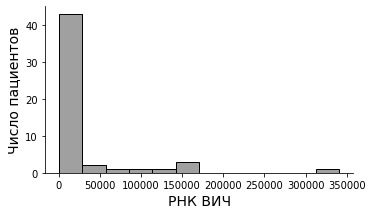

In [ ]:
x_names = ['hivrna']

rna_cat = df_gr_emph[df_gr_emph['hivrna']>50] # 75- детектируемый порог

fig = plt.figure(figsize=(5*2.3, 5*3))
for i,x in enumerate(x_names):
  ax = fig.add_subplot(4, 2, i+1)
  hist = sns.histplot(data=rna_cat, x=x, bins=round(len(df[x])**0.5), color='#808080')
  ax.set_xlabel(dic_names[x], fontsize=14)
  ax.set_ylabel('Число пациентов', fontsize=14)
#  ax.set_xlim([50,5000])
#ax = fig.add_subplot(3, 4, 7)

#fig.text(0.08, 0.5, 'Процент пациентов, %', ha='center', va='center', rotation='vertical',fontsize=16)
plt.subplots_adjust(wspace=0.08, hspace=0.3)
sns.despine()

In [ ]:
df[['cd4', 's_cd14', 'nadir_cd4', 'cd4_cd8_ratio', 'hivrna', 'BMI', 'pack_years']].skew()

cd4              1.507036
s_cd14           0.341725
nadir_cd4        2.042259
cd4_cd8_ratio    1.309373
hivrna           6.097845
BMI              1.249576
pack_years       1.393053
dtype: float64

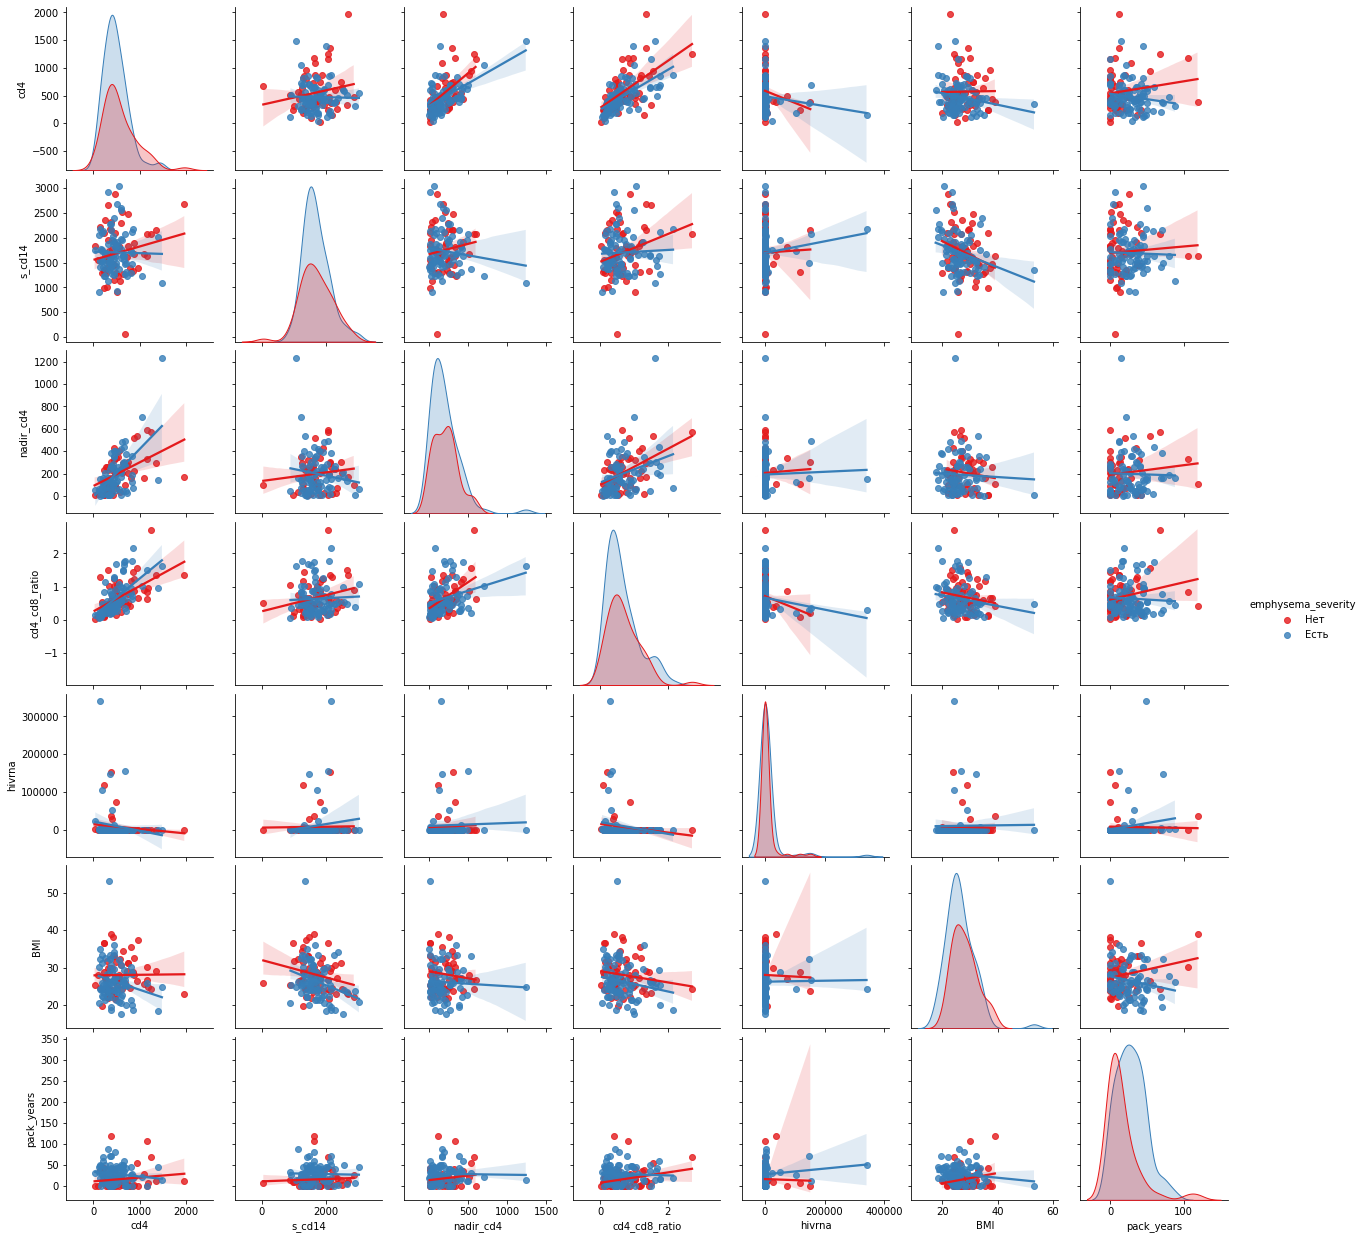

In [ ]:
df_plt_row1 = df.copy()
df_plt_row1['emphysema_severity'] = df_plt_row1['emphysema_severity'].apply(lambda x:'Нет' if x=='0%' else 'Есть')

var=['cd4', 's_cd14', 'nadir_cd4', 'cd4_cd8_ratio', 'hivrna', 'BMI', 'pack_years']

%config InlineBackend.figure_format = 'png'

pp = sns.pairplot(df_plt_row1,
             vars=var, kind='reg', hue='emphysema_severity',
             dropna=True, palette='Set1')#, corner=True)

Spearman correlation

In [ ]:
corr_matrix = df[['cd4', 's_cd14', 'nadir_cd4', 'cd4_cd8_ratio', 'hivrna', 'BMI', 'pack_years']].corr('spearman')
corr_matrix

,cd4,s_cd14,nadir_cd4,cd4_cd8_ratio,hivrna,BMI,pack_years
cd4,1.000000,0.052221,0.537813,0.666671,-0.360296,0.005213,-0.082968
s_cd14,0.052221,1.000000,0.079306,0.124256,-0.093704,-0.280829,0.035296
nadir_cd4,0.537813,0.079306,1.000000,0.358801,-0.097499,0.000972,0.022012
cd4_cd8_ratio,0.666671,0.124256,0.358801,1.000000,-0.414635,-0.137459,0.006502
hivrna,-0.360296,-0.093704,-0.097499,-0.414635,1.000000,0.113457,0.105096
BMI,0.005213,-0.280829,0.000972,-0.137459,0.113457,1.000000,-0.105000
pack_years,-0.082968,0.035296,0.022012,0.006502,0.105096,-0.105000,1.000000


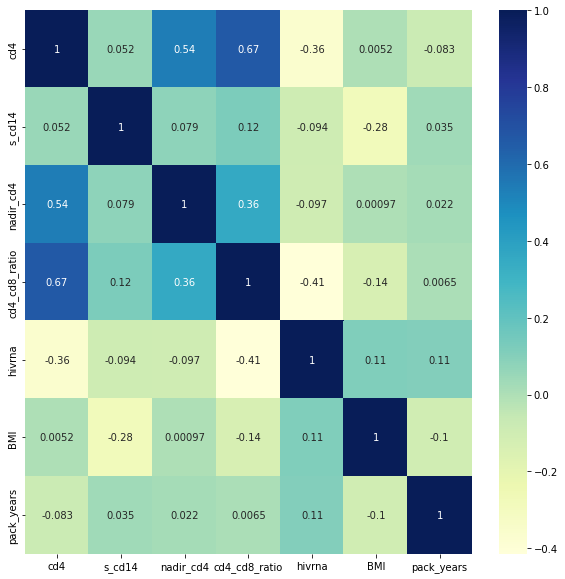

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True);

#### Лекарства

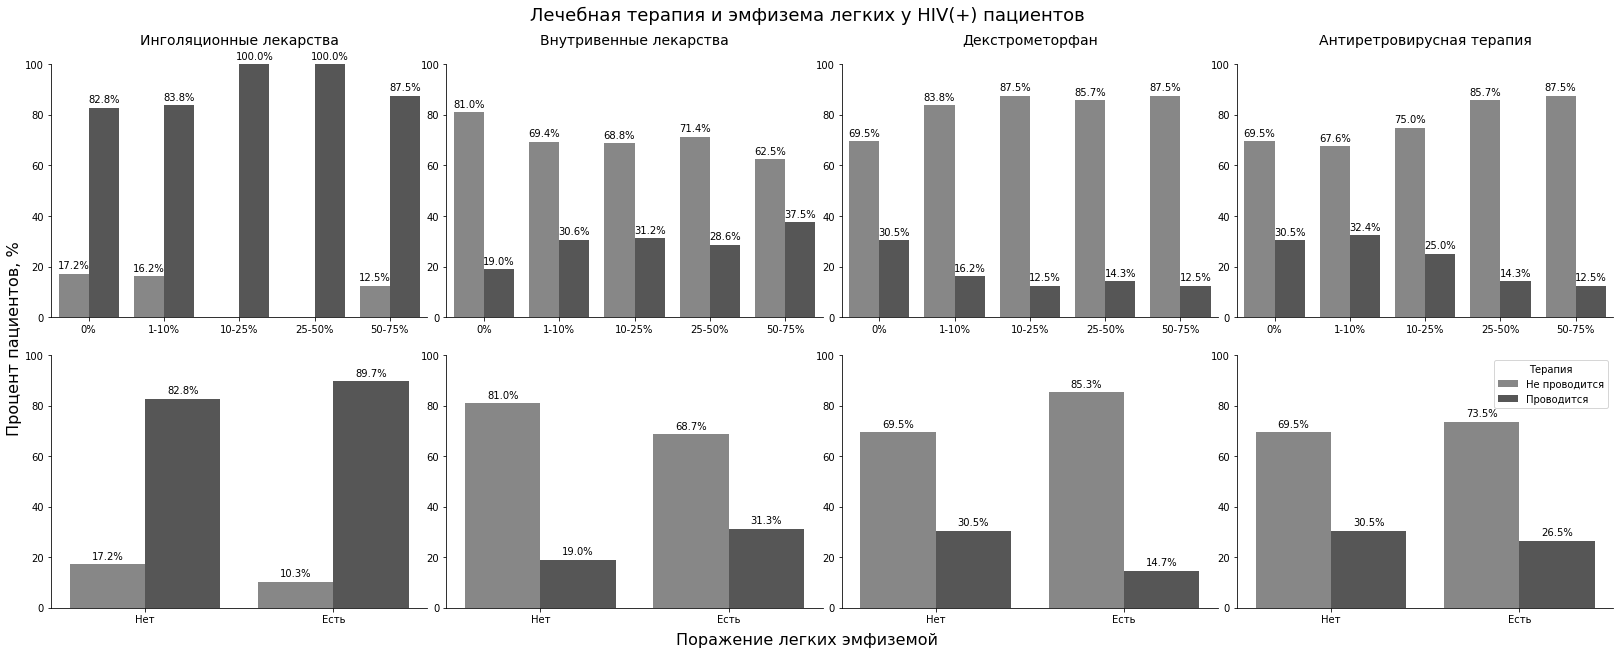

In [ ]:
y = 'emphysema_severity'
x_names = ['inhalational_drugs', 'ivdu', 'dm', 'ART_use']

order_bar = [['0%','1-10%','10-25%','25-50%', '50-75%'], ['Нет', 'Есть']]
order_hue = ['Не проводится', 'Проводится']

df_=[df, df_cat]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(7*4, 5*2), squeeze=False) #, sharex=True, sharey=True

#gs = fig.add_gridspec(2, 3)

# histogram
for j in range(len(df_)):
  #hist
  for i,x in  enumerate(x_names):
      #numb of pat
    #  df_n = df_cat_rus.groupby(['pneu',x])['pneu'].size().rename('Number').reset_index().sort_values(['Number'],ascending=False).sort_values('pneu')
    #  df_n = list(df_n['Number'])

    hist = (df_[j].groupby([y])[x]
        .value_counts(normalize=True) #normalising
        .mul(100) #percent
        .rename('percent')
        .reset_index()
        .pipe((sns.barplot,'data'), x=y,y='percent',hue=x, ax=axes[j,i], palette='Greys_d', order=order_bar[j], hue_order=order_hue)) 

    # graph titles
    axes[0, i].set_title(dic_names[x], fontsize=14, pad=20)

    #axes lables
    axes[j, i].set_xlabel('', fontsize=14) #hist
    axes[j, i].set_ylabel('', fontsize=14) #hist

    # axes span
    axes[j, i].set_ylim(0,100)
    # hist.axis('off')
      
    #legend
    hist.legend_.remove() #remove the legend
    #  handles, labels = axes[...].get_legend_handles_labels()

    # annotation (adding lables above the bars)
    for bar in hist.patches:
      hist.annotate('{}%'.format(bar.get_height().round(1)),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points') 
#legend
axes[1,3].legend(title='Терапия', loc='upper right') #frameon=False

  # ticks lables
#    hist.set_xticklabels(ticklables[j], size=12) 
#    box.set_xticklabels(ticklables, size=12) 
#    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

  # leave only outer titles
#  for ax in fig.get_axes():
#      ax.label_outer()


#legend outside the graph only
#  hist.legend_.remove() #remove the legend
#handles, labels = axes[0,0].get_legend_handles_labels()
#fig.legend(handles, ['Не проводится', 'Проводится'], loc=[0.91,0.5], title='Терапия') #create new one
#handles, labels = axes[0,0].get_legend_handles_labels()
#fig.legend(handles, labels, loc=[0.9,0.25], title='Уровень') #create new one

# graph lables
fig.suptitle('Лечебная терапия и эмфизема легких у HIV(+) пациентов',fontsize=18, y=0.96)
fig.text(0.5, 0.08, 'Поражение легких эмфиземой', ha='center', va='center',fontsize=16 )
fig.text(0.107, 0.5, 'Процент пациентов, %', ha='center', va='center', rotation='vertical',fontsize=16)

#fig.supxlabel('common_x')
#fig.supylabel('common_y')

# distance between graphs
plt.subplots_adjust(wspace=0.05, hspace=0.15)
#
#fig.tight_layout() 
sns.despine()

##### Проверка стат.гипотез

Сравнения чисел событий

Критерий хи-квадрат для матрицы n*m

In [ ]:
from scipy.stats import chi2_contingency

val = ['inhalational_drugs', 'ivdu', 'dm', 'ART_use']
emf_st = ['0%','1-10%','10-25%','25-50%', '50-75%']
val_st=['Не проводится', 'Проводится']

l = []
for v in val:
  for i in emf_st:
    for j in val_st:
      l.append(df[( (df['emphysema_severity']==i) & (df[v]==j) )][v].count())

  l_gr = [l[x:x+len(val_st)] for x in range(0, len(l), len(val_st))]  # разбиваем на подлисты по группам (знач в листе упорядочены)

  g, p, dof, expctd = chi2_contingency(np.array(l_gr))
  print(dic_names[v], p, '\n')

Инголяционные лекарства 0.33927530805980577 

Внутривенные лекарства 2.7615802399962114e-17 

Декстрометорфан 3.747997753017906e-23 

Антиретровирусная терапия 8.313811146838088e-24 



Точный тест Фишера таблица 2*2

In [ ]:
from scipy import stats

val = ['inhalational_drugs', 'ivdu', 'dm', 'ART_use']

for i in val:
  x_hd = [df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Проводится'))][i].count(),
          df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Не проводится'))][i].count()]

  x_no_hd = [df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Проводится'))][i].count(),
            df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Не проводится'))][i].count()]
  oddsratio, pvalue = stats.fisher_exact([x_hd,x_no_hd], alternative='two-sided')

  print(dic_names[i], pvalue, '\n')

Инголяционные лекарства 0.30148177586938907 

Внутривенные лекарства 0.15055621716790543 

Декстрометорфан 0.052224809398467284 

Антиретровирусная терапия 0.6943277606722479 



Почитать про эти лекарства, что имели ввиду авторы

#### Сопутствующие заболевания

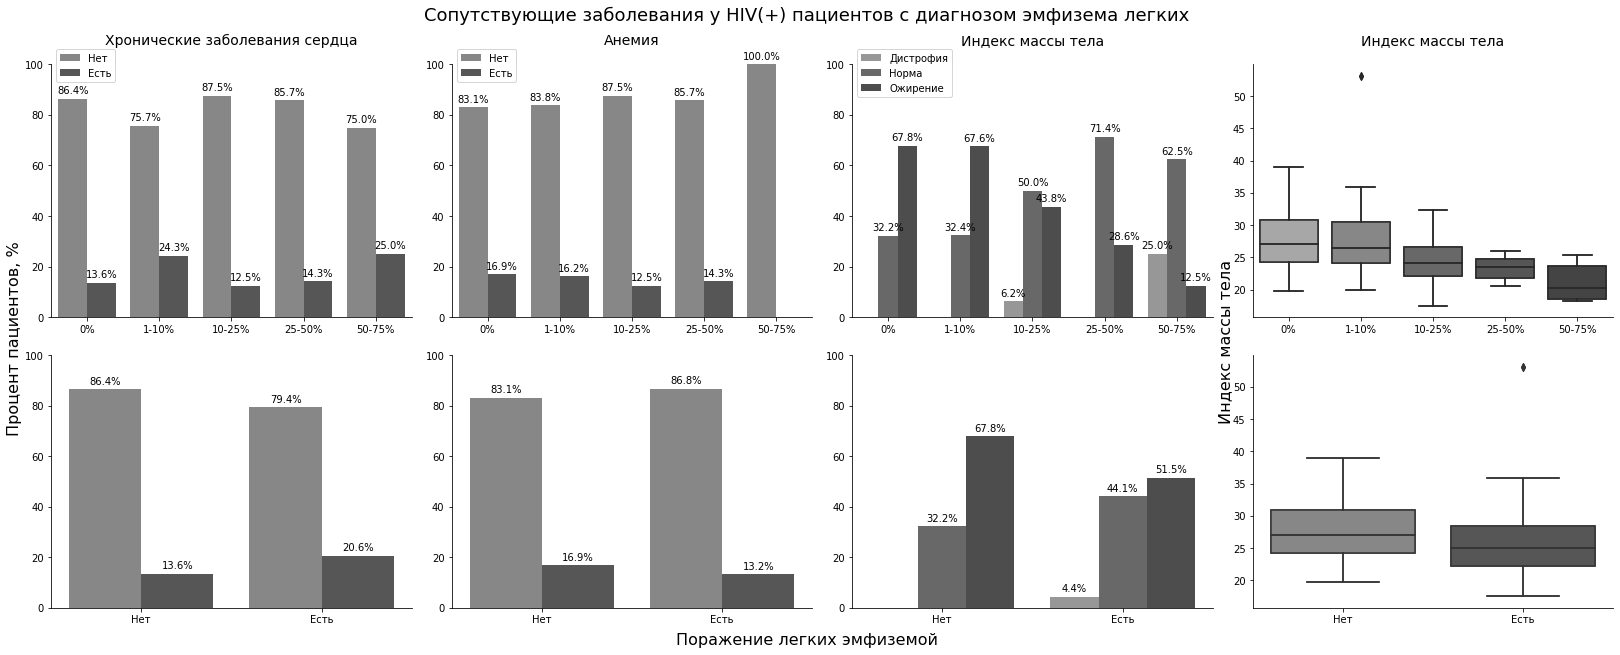

In [ ]:
y = 'emphysema_severity'
x_names = ['chronic_heart_disease','anemia', 'BMI']
#ticklables = [['0%','1-10%','10-25%','25-50%', '50-75%','>75%'], ['Нет', 'Есть']]

df_plt_row1 = df.copy()
df_plt_row1['BMI'] = df['BMI'].apply(lambda x:'Дистрофия' if x<18.5 else ('Норма' if (x>=18.5 and x<24.9) else 'Ожирение'))
df_=[df_plt_row1, df_cat]

order_bar = [['0%','1-10%','10-25%','25-50%', '50-75%'], ['Нет', 'Есть']]
order_hue = [['Нет', 'Есть'], ['Нет', 'Есть'], ['Дистрофия','Норма','Ожирение']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(7*4, 5*2), squeeze=False) #, sharex=True, sharey=True

#gs = fig.add_gridspec(2, 3)

# histogram
for j in range(len(df_)):
  #hist
  for i,x in  enumerate(x_names):
      #numb of pat
    #  df_n = df_cat_rus.groupby(['pneu',x])['pneu'].size().rename('Number').reset_index().sort_values(['Number'],ascending=False).sort_values('pneu')
    #  df_n = list(df_n['Number'])

    hist = (df_[j].groupby([y])[x]
        .value_counts(normalize=True) #normalising
        .mul(100) #percent
        .rename('percent')
        .reset_index()
        .pipe((sns.barplot,'data'), x=y,y='percent',hue=x, ax=axes[j,i], palette='Greys_d', order=order_bar[j], hue_order = order_hue[i])) 

    # graph titles
    axes[0, i].set_title(dic_names[x], fontsize=14, pad=20)

    #axes lables
    axes[j, i].set_xlabel('', fontsize=14) #hist
    axes[j, i].set_ylabel('', fontsize=14) #hist

    # axes span
    axes[j, i].set_ylim(0,100)
    # hist.axis('off')
      
    #legend
    hist.legend_.remove() #remove the legend
    #  handles, labels = axes[...].get_legend_handles_labels()
    axes[0,i].legend(title='', loc='upper left', bbox_to_anchor=(0, 1.08)) #frameon=False

    # annotation (adding lables above the bars)
    for bar in hist.patches:
      hist.annotate('{}%'.format(bar.get_height().round(1)),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points') 

  # box
  box = sns.boxplot(x = y, y = 'BMI', data=df, ax=axes[0, 3], palette='Greys_d') # ничего не сгруппировано
  box = sns.boxplot(x = df_cat[y], y = df['BMI'], ax=axes[1, 3], palette='Greys_d') # сгруппированы стадии эмфиземы

  axes[0, 3].set_xlabel('', fontsize=14) #box
  axes[0, 3].set_ylabel('', fontsize=14) #box
  axes[1, 3].set_xlabel('', fontsize=14) #box
  axes[1, 3].set_ylabel('', fontsize=14) #box

axes[0, 3].set_title('Индекс массы тела', fontsize=14, pad=20)
box.text(-0.65, 57, 'Индекс массы тела',fontsize=16, ha='center', va='center', rotation='vertical')

  # ticks lables
#    hist.set_xticklabels(ticklables[j], size=12) 
#    box.set_xticklabels(ticklables, size=12) 
#    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

  # leave only outer titles
#  for ax in fig.get_axes():
#      ax.label_outer()


#legend
#handles, labels = axes[0,0].get_legend_handles_labels()
#fig.legend(handles, labels, loc=[0.9,0.25], title='Уровень') #create new one

# graph lables
fig.suptitle('Сопутствующие заболевания у HIV(+) пациентов с диагнозом эмфизема легких',fontsize=18, y=0.96)
fig.text(0.5, 0.08, 'Поражение легких эмфиземой', ha='center', va='center',fontsize=16 )
fig.text(0.107, 0.5, 'Процент пациентов, %', ha='center', va='center', rotation='vertical',fontsize=16)

#fig.supxlabel('common_x')
#fig.supylabel('common_y')

# distance between graphs
plt.subplots_adjust(wspace=0.11, hspace=0.15)
#
#fig.tight_layout() 
sns.despine()

#### Средняя и дов.вероятность (индекс массы тела

##### Проверка стат.гипотез

**Chronical heart desiases, anemia** - категориальные переменные (есть/нет) (Выборки разной длины)

Сравнение чисел событий

Критерий хи-квадрат для таблицы n*m

In [ ]:
from scipy.stats import chi2_contingency

val = ['chronic_heart_disease','anemia']
emf_st = ['0%','1-10%','10-25%','25-50%', '50-75%']
val_st=['Нет', 'Есть']

l = []
for v in val:
  for i in emf_st:
    for j in val_st:
      l.append(df[( (df['emphysema_severity']==i) & (df[v]==j) )][v].count())

  l_gr = [l[x:x+len(val_st)] for x in range(0, len(l), len(val_st))]  # разбиваем на подлисты по группам (знач в листе упорядочены)

  g, p, dof, expctd = chi2_contingency(np.array(l_gr))
  print(dic_names[v], p, '\n')

Хронические заболевания сердца 0.6474914921227166 

Анемия 0.8753678313409112 



*Точный тест Фишера* (двусторонний, мы знаем, что другие легочные заболевания могут сопровождаться такими симптомами, но насчет эмфиземы мы не знаем заранее)

In [ ]:
from scipy import stats

val = ['chronic_heart_disease','anemia']

for i in val:
  x_hd = [df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Есть'))][i].count(),
          df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Нет'))][i].count()]

  x_no_hd = [df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Есть'))][i].count(),
            df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Нет'))][i].count()]

  oddsratio, pvalue = stats.fisher_exact([x_hd,x_no_hd], alternative='two-sided')

  print(i)
  print(x_hd,x_no_hd)
  print(pvalue, '\n')


chronic_heart_disease
[8, 51] [14, 54]
0.3519448485414212 

anemia
[10, 49] [9, 59]
0.6227601766584268 



**BMI** - количественный параметр (выборки разной длины)

Критерий Краскела-Уоллиса (Kruskal-Wallis H-test) 

In [ ]:
from scipy.stats import kruskal

val = ['BMI']
emf_st = ['0%','1-10%','10-25%','25-50%', '50-75%']

for i in val:
  x_1 =  df[df['emphysema_severity']=='0%'][i]
  x_2 =  df[df['emphysema_severity']=='1-10%'][i]
  x_3 =  df[df['emphysema_severity']=='10-25%'][i]
  x_4 =  df[df['emphysema_severity']=='25-50%'][i]
  x_5 =  df[df['emphysema_severity']=='50-75%'][i]

  print(kruskal(x_1, x_2, x_3, x_4, x_5, nan_policy='omit'))

KruskalResult(statistic=23.62836576080611, pvalue=9.481051042692885e-05)


Переведем количественный параметр в качественный

Критерий хи-квадрат для таблицы n*m

In [ ]:
from scipy.stats import chi2_contingency

df_bmi_gr = df.copy()
df_bmi_gr['BMI'] = df_bmi_gr['BMI'].map(lambda x:'Дистрофия' if x<18.5 else ('Норма' if (x>=18.5 and x<24.9) else (np.nan if x!=x else 'Ожирение')))

val = ['BMI']
emf_st = ['0%','1-10%','10-25%','25-50%', '50-75%']
val_st=['Дистрофия','Норма','Ожирение']

l = []
for v in val:
  for i in emf_st:
    for j in val_st:
      l.append(df_bmi_gr[( (df_bmi_gr['emphysema_severity']==i) & (df_bmi_gr[v]==j) )][v].count())

  l_gr = [l[x:x+len(val_st)] for x in range(0, len(l), len(val_st))]  # разбиваем на подлисты по группам (знач в листе упорядочены)

  g, p, dof, expctd = chi2_contingency(np.array(l_gr))

  print(dic_names[v], p, '\n')

Индекс массы тела 0.00012065483465323758 



Точный тест Фишера для таблицы 3*2

In [ ]:
from scipy.stats import chi2_contingency

val = ['BMI']
emf_st = ['Нет', 'Есть']
val_st=['Дистрофия','Норма','Ожирение']

l = []
for v in val:
  for i in emf_st:
    for j in val_st:
      l.append(df_cat[( (df_cat['emphysema_severity']==i) & (df_cat[v]==j) )][v].count())

  l_gr = [l[x:x+len(val_st)] for x in range(0, len(l), len(val_st))]  # разбиваем на подлисты по группам (знач в листе упорядочены)

  g, p, dof, expctd = chi2_contingency(np.array(l_gr))

  print(dic_names[v], p, '\n')

Индекс массы тела 0.07460874741727648 



Сравнить поочередно с поправкой бонферонни

#### Курение

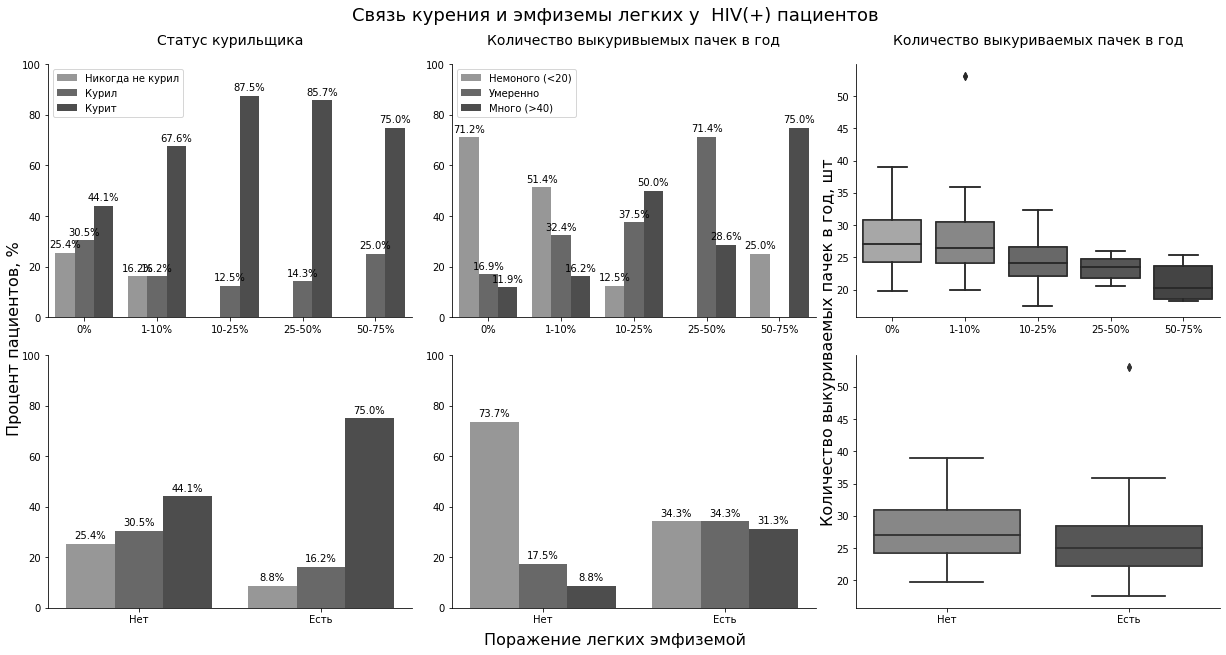

In [ ]:
y = 'emphysema_severity'
x_names = ['smoking_status','pack_years']

df_plt_row1 = df.copy()
df_plt_row1['pack_years'] = df_plt_row1['pack_years'].apply(lambda x:'Немоного (<20)' if x<20 else ('Умеренно' if (x>=20 and x<40) else 'Много (>40)'))
df_=[df_plt_row1, df_cat]

order_bar = [['0%','1-10%','10-25%','25-50%', '50-75%'], ['Нет', 'Есть']]
order_hue = {'pack_years':['Немоного (<20)','Умеренно','Много (>40)'],
             'smoking_status':['Никогда не курил','Курил','Курит']}

#order_hue = [['Нет', 'Есть'], ['Нет', 'Есть'], ['Дистрофия','Норма','Ожирение']]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(7*3, 5*2), squeeze=False) #, sharex=True, sharey=True

#gs = fig.add_gridspec(2, 3)

# histogram
for j in range(len(df_)):
  #hist
  for i,x in  enumerate(x_names):
      #numb of pat
    #  df_n = df_cat_rus.groupby(['pneu',x])['pneu'].size().rename('Number').reset_index().sort_values(['Number'],ascending=False).sort_values('pneu')
    #  df_n = list(df_n['Number'])

    hist = (df_[j].groupby([y])[x]
        .value_counts(normalize=True) #normalising
        .mul(100) #percent
        .rename('percent')
        .reset_index()
        .pipe((sns.barplot,'data'), x=y,y='percent',hue=x, ax=axes[j,i], palette='Greys_d', order=order_bar[j], hue_order = order_hue[x])) 

    # graph titles
    axes[0, i].set_title(dic_names[x], fontsize=14, pad=20)

    #axes lables
    axes[j, i].set_xlabel('', fontsize=14) #hist
    axes[j, i].set_ylabel('', fontsize=14) #hist

    # axes span
    axes[j, i].set_ylim(0,100)
    # hist.axis('off')
      
    #legend
    hist.legend_.remove() #remove the legend
    #  handles, labels = axes[...].get_legend_handles_labels()
    axes[0,i].legend(title='', loc='upper left')#, bbox_to_anchor=(0, 1.08)) #frameon=False

    # annotation (adding lables above the bars)
    for bar in hist.patches:
      hist.annotate('{}%'.format(bar.get_height().round(1)),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points') 

  # box
  box = sns.boxplot(x = y, y = 'BMI', data=df, ax=axes[0, 2], palette='Greys_d') # ничего не сгруппировано
  box = sns.boxplot(x = df_cat[y], y = df['BMI'], ax=axes[1, 2], palette='Greys_d') # сгруппированы стадии эмфиземы

  axes[0, 2].set_xlabel('', fontsize=14) #box
  axes[0, 2].set_ylabel('', fontsize=14) #box
  axes[1, 2].set_xlabel('', fontsize=14) #box
  axes[1, 2].set_ylabel('', fontsize=14) #box

axes[0, 2].set_title('Количество выкуриваемых пачек в год', fontsize=14, pad=20)
box.text(-0.65, 57, 'Количество выкуриваемых пачек в год, шт',fontsize=16, ha='center', va='center', rotation='vertical')

  # ticks lables
#    hist.set_xticklabels(ticklables[j], size=12) 
#    box.set_xticklabels(ticklables, size=12) 
#    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

  # leave only outer titles
#  for ax in fig.get_axes():
#      ax.label_outer()


#legend
#handles, labels = axes[0,0].get_legend_handles_labels()
#fig.legend(handles, labels, loc=[0.9,0.25], title='Уровень') #create new one

# graph lables
fig.suptitle('Связь курения и эмфиземы легких у  HIV(+) пациентов',fontsize=18, y=0.96)
fig.text(0.5, 0.08, 'Поражение легких эмфиземой', ha='center', va='center',fontsize=16 )
fig.text(0.103, 0.5, 'Процент пациентов, %', ha='center', va='center', rotation='vertical',fontsize=16)

#fig.supxlabel('common_x')
#fig.supylabel('common_y')

# distance between graphs
plt.subplots_adjust(wspace=0.11, hspace=0.15)
#
#fig.tight_layout() 
sns.despine()

##### Проверка стат.гипотез

**Статус курильщика** - качественный параметр

Тест хи-квадрат для матрицы n*m



In [ ]:
from scipy.stats import chi2_contingency

val = ['smoking_status']
emf_st = ['Нет', 'Есть']
val_st=['Никогда не курил','Курил','Курит']

l = []
for v in val:
  for i in emf_st:
    for j in val_st:
      l.append(df_cat[( (df_cat['emphysema_severity']==i) & (df_cat[v]==j) )][v].count())

  l_gr = [l[x:x+len(val_st)] for x in range(0, len(l), len(val_st))]  # разбиваем на подлисты по группам (знач в листе упорядочены)

  g, p, dof, expctd = chi2_contingency(np.array(l_gr))

  print(dic_names[v], p, '\n')

Статус курильщика 0.0014361116085098776 



Тест хи-квадрат для матрицы 3*2

In [ ]:
from scipy.stats import chi2_contingency

val = ['smoking_status']

for i in val:
  x_hd =  np.array([[df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Курит'))][i].count(),
          df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Курил'))][i].count(),
          df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Никогда не курил'))][i].count()],

         [df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Курит'))][i].count(),
          df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Курил'))][i].count(),
          df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Никогда не курил'))][i].count()]])

  g, p, dof, expctd = chi2_contingency(x_hd)
  print(p)

0.0014361116085098776


**Количество выкуриваемых пачек сигарет за год** - количественный параметр

Количество пачек в год-дисперсионный анализ \\
Критерий Краскела Уоллиса (Kruskal-Wallis H-test)

In [ ]:
from scipy.stats import kruskal

val = ['pack_years']
emf_st = ['0%','1-10%','10-25%','25-50%', '50-75%']

for i in val:
  x_1 =  df[df['emphysema_severity']=='0%'][i]
  x_2 =  df[df['emphysema_severity']=='1-10%'][i]
  x_3 =  df[df['emphysema_severity']=='10-25%'][i]
  x_4 =  df[df['emphysema_severity']=='25-50%'][i]
  x_5 =  df[df['emphysema_severity']=='50-75%'][i]

  print(kruskal(x_1, x_2, x_3, x_4, x_5, nan_policy='omit'))


KruskalResult(statistic=31.089504966410313, pvalue=2.935351054399407e-06)


Переведем количественный параметр в качественный (для сравнения гипотез)

Критерий Уилкоксона

Критерий хи квадрат для 3*2 матрицы

In [ ]:
from scipy.stats import chi2_contingency

val = ['pack_years']

for i in val:
  x_hd =  np.array([[df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Немоного (<20)'))][i].count(),
          df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Умеренно'))][i].count(),
          df_cat[((df_cat['emphysema_severity']=='Нет') & (df_cat[i]=='Много (>40)'))][i].count()],
         [df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Немоного (<20)'))][i].count(),
            df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Умеренно'))][i].count(),
            df_cat[((df_cat['emphysema_severity']=='Есть') & (df_cat[i]=='Много (>40)'))][i].count()]])

  g, p, dof, expctd = chi2_contingency(x_hd)
  print(p)

4.908736946369618e-05


#### Иммунитет

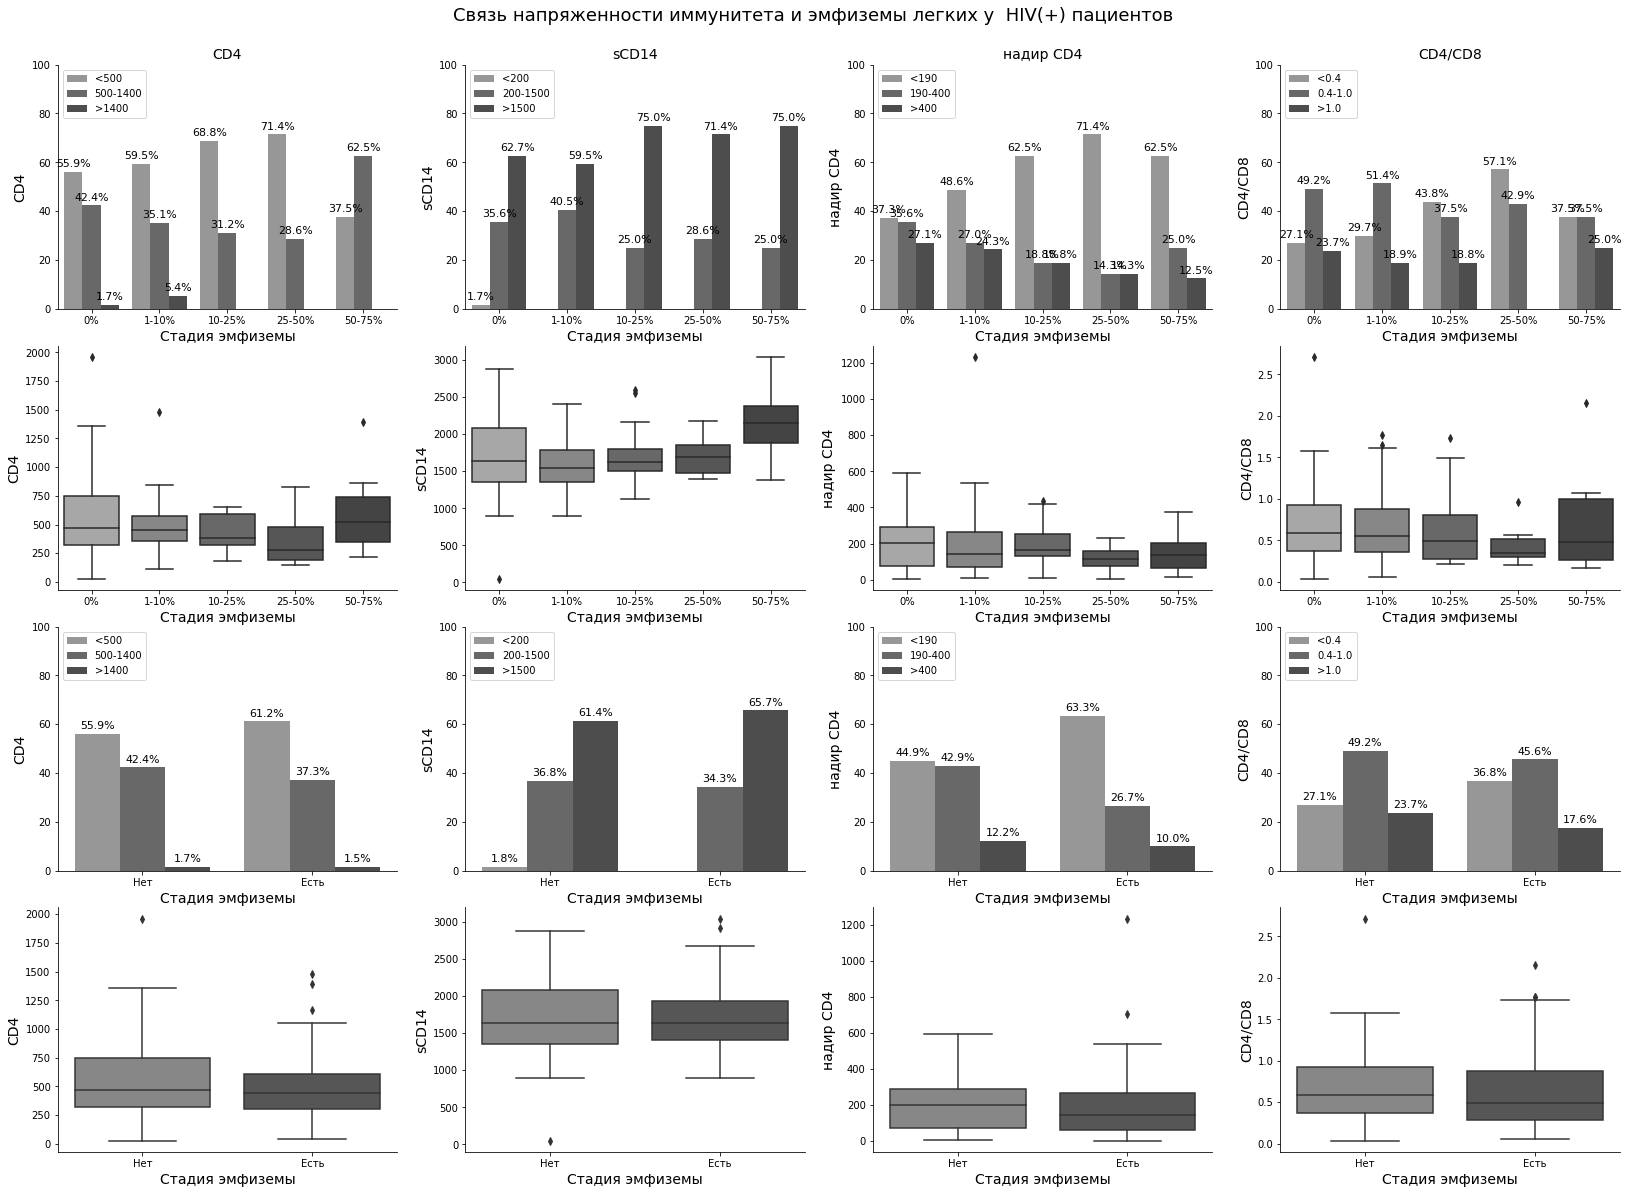

In [ ]:
y = 'emphysema_severity'
x_names = ['cd4','s_cd14', 'nadir_cd4', 'cd4_cd8_ratio']

df_plt_row1 = df.copy()
df_plt_row1['emphysema_severity'] = df_plt_row1['emphysema_severity'].apply(lambda x:'Нет' if x=='0%' else 'Есть')

df_plt_row2 = df.copy()
df_plt_row2['cd4'] = df_plt_row2['cd4'].apply(lambda x:'Низкий' if x<500 else ('Нормальный' if (x>=500 and x<1400) else 'Высокий'))
df_plt_row2['cd4_cd8_ratio'] = df_plt_row2['cd4_cd8_ratio'].apply(lambda x:'Низкий' if x<0.4 else ('Нормальный' if (x>=0.4 and x<1.0) else 'Высокий'))
df_plt_row2['s_cd14'] = df_plt_row2['s_cd14'].apply(lambda x:'Низкий' if x<200 else ('Нормальный' if (x>=200 and x<1500) else 'Высокий'))
df_plt_row2['nadir_cd4'] = df_plt_row2['nadir_cd4'].apply(lambda x:'Низкий' if x<190 else ('Нормальный' if (x>=190 and x<400) else 'Высокий'))

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7*4, 5*4), squeeze=False) #, sharex=True, sharey=True
df_1=[df, df_plt_row1]
df_2=[df_plt_row2, df_cat]

order_hue = ['Низкий', 'Нормальный', 'Высокий']
order_bar = [['0%','1-10%','10-25%','25-50%', '50-75%'], ['Нет', 'Есть']]

labels_ = {'cd4':['<500','500-1400', '>1400'], 
           'cd4_cd8_ratio':['<0.4','0.4-1.0', '>1.0'],
           's_cd14':['<200', '200-1500', '>1500'],
           'nadir_cd4':['<190', '190-400', '>400']}

for i,x in  enumerate(x_names): # для колонок
  for k,j in [0,1],[1,3]:  # для этих рядов
    #boxplot
    box = sns.boxplot(x = y, y = x, data=df_1[k], ax=axes[j, i], palette='Greys_d')
    axes[j, i].set_xlabel(dic_names[y], fontsize=14)
    axes[j, i].set_ylabel(dic_names[x], fontsize=14)

  for k, d in zip([0,1],[0,2]):  # для этих рядов
    hist = (df_2[k].groupby([y])[x]
        .value_counts(normalize=True) #normalising
        .mul(100) #percent
        .rename('percent')
        .reset_index()
        .pipe((sns.barplot,'data'), x=y,y='percent',hue=x, ax=axes[d,i], palette='Greys_d', order=order_bar[k], hue_order = order_hue)) 
    
    #axes lables
    axes[d, i].set_xlabel(dic_names[y], fontsize=14)
    axes[d, i].set_ylabel(dic_names[x], fontsize=14)

    # graph titles
    axes[0, i].set_title(dic_names[x], fontsize=14, pad=20)

    # axes span
    axes[d, i].set_ylim(0,100)
    
    # legend
    handles, labels = axes[d,i].get_legend_handles_labels()
    axes[d,i].legend(title='', handles=handles, labels=labels_[x], loc='upper left')#, bbox_to_anchor=(0, 1.08)) #frameon=False

    # annotation (adding lables above the bars)
    for bar in hist.patches:
      hist.annotate('{}%'.format(bar.get_height().round(1)),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=11, xytext=(0, 8),
                    textcoords='offset points') 

  axes[0, i].set_title(dic_names[x], fontsize=14)  # column title

#legend
#handles, labels = axes[0,0].get_legend_handles_labels()
#fig.legend(handles, labels, loc=[0.9,0.25], title='Уровень') #create new one

# graph lables
fig.suptitle('Связь напряженности иммунитета и эмфиземы легких у  HIV(+) пациентов',fontsize=18, y=0.92)
#fig.text(0.5, 0.1, 'Поражение легких эмфиземой', ha='center', va='center',fontsize=16 )
#fig.text(0.103, 0.5, 'Процент пациентов, %', ha='center', va='center', rotation='vertical',fontsize=16)

#fig.supxlabel('common_x')
#fig.supylabel('common_y')

# distance between graphs
plt.subplots_adjust(wspace=0.2, hspace=0.15)
#
#fig.tight_layout() 
sns.despine()

##### Проверка стат.гипотез

In [ ]:
from scipy.stats import kruskal

val = ['cd4','s_cd14', 'nadir_cd4', 'cd4_cd8_ratio']
emf_st = ['0%','1-10%','10-25%','25-50%', '50-75%']

for i in val:
  x_1 =  df[df['emphysema_severity']=='0%'][i]
  x_2 =  df[df['emphysema_severity']=='1-10%'][i]
  x_3 =  df[df['emphysema_severity']=='10-25%'][i]
  x_4 =  df[df['emphysema_severity']=='25-50%'][i]
  x_5 =  df[df['emphysema_severity']=='50-75%'][i]

  print(i, kruskal(x_1, x_2, x_3, x_4, x_5, nan_policy='omit'))


cd4 KruskalResult(statistic=4.9959868200384605, pvalue=0.2877095204588947)
s_cd14 KruskalResult(statistic=7.9952058371735575, pvalue=0.09175396870046523)
nadir_cd4 KruskalResult(statistic=2.5487929089416266, pvalue=0.6359204945643349)
cd4_cd8_ratio KruskalResult(statistic=2.2252729035194534, pvalue=0.6944050931568879)


U-тест (Манна – Уитни) = R-тест (Уилкоксона) (есть ли систематический сдвиг?) (эмфизема сгруппирована по критерию есть-нет)

In [ ]:
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp

df_gr_emph = df.copy()
df_gr_emph['emphysema_severity'] = df_gr_emph['emphysema_severity'].apply(lambda x:'Нет' if x=='0%' else 'Есть')

x_names = ['cd4', 's_cd14', 'nadir_cd4', 'cd4_cd8_ratio', 'hivrna']

for i in x_names:
  x_emf = df_gr_emph[df_gr_emph['emphysema_severity']=='Есть'][i]
  x_no_emf = df_gr_emph[df_gr_emph['emphysema_severity']=='Нет'][i]
  print(dic_names[i])
  print(mannwhitneyu(x=x_emf,y=x_no_emf))
  print(ks_2samp(x_emf,x_no_emf), '\n')
  

CD4
MannwhitneyuResult(statistic=2309.5, pvalue=0.12919110337083245)
Ks_2sampResult(statistic=0.163135593220339, pvalue=0.2608528775326894) 

sCD14
MannwhitneyuResult(statistic=2586.0, pvalue=0.485026473730026)
Ks_2sampResult(statistic=0.10053929121725731, pvalue=0.8191061932179629) 

надир CD4
MannwhitneyuResult(statistic=2360.5, pvalue=0.17652159869680945)
Ks_2sampResult(statistic=0.1612095531587057, pvalue=0.2794872658490166) 

CD4/CD8
MannwhitneyuResult(statistic=2393.0, pvalue=0.21178737618377824)
Ks_2sampResult(statistic=0.11575500770416025, pvalue=0.6765088347303085) 

РНК ВИЧ
MannwhitneyuResult(statistic=2466.5, pvalue=0.290756853411629)
Ks_2sampResult(statistic=0.10323574730354391, pvalue=0.8000095145694635) 



критерий хи квадрат для таблицы n*m

In [ ]:
df_im_gr = df.copy()
df_im_gr['cd4'] = df_im_gr['cd4'].apply(lambda x:'Низкий' if x<500 else ('Нормальный' if (x>=500 and x<1400) else (np.nan if x!=x else 'Высокий')))
df_im_gr['cd4_cd8_ratio'] = df_im_gr['cd4_cd8_ratio'].apply(lambda x:'Низкий' if x<0.4 else ('Нормальный' if (x>=0.4 and x<1.0) else (np.nan if x!=x else 'Высокий')))
df_im_gr['s_cd14'] = df_im_gr['s_cd14'].apply(lambda x:'Низкий' if x<200 else ('Нормальный' if (x>=200 and x<1500) else (np.nan if x!=x else 'Высокий')))
df_im_gr['nadir_cd4'] = df_im_gr['nadir_cd4'].apply(lambda x:'Низкий' if x<190 else ('Нормальный' if (x>=190 and x<400) else (np.nan if x!=x else 'Высокий')))


In [ ]:
from scipy.stats import chi2_contingency

val = ['cd4','s_cd14', 'nadir_cd4', 'cd4_cd8_ratio']
emf_st = ['0%','1-10%','10-25%','25-50%', '50-75%']
val_st=['Низкий','Нормальный','Высокий']

l = []
for v in val:
  for i in emf_st:
    for j in val_st:
      l.append(df_im_gr[( (df_im_gr['emphysema_severity']==i) & (df_im_gr[v]==j) )][v].count())

  l_gr = [l[x:x+len(val_st)] for x in range(0, len(l), len(val_st))]  # разбиваем на подлисты по группам (знач в листе упорядочены)

  g, p, dof, expctd = chi2_contingency(np.array(l_gr))

  print(dic_names[v], p, '\n')

CD4 0.8757036447785127 

sCD14 3.659670241854e-23 

надир CD4 7.106534443356784e-26 

CD4/CD8 3.3429721121838854e-25 



критерий хи квадрат для таблицы 3*2

In [ ]:
from scipy.stats import chi2_contingency

val = ['cd4','s_cd14', 'nadir_cd4', 'cd4_cd8_ratio']
emf_st = ['Нет', 'Есть']
val_st=['Низкий','Нормальный','Высокий']

l = []
for v in val:
  for i in emf_st:
    for j in val_st:
      l.append(df_cat[( (df_cat['emphysema_severity']==i) & (df_cat[v]==j) )][v].count())

  l_gr = [l[x:x+len(val_st)] for x in range(0, len(l), len(val_st))]  # разбиваем на подлисты по группам (знач в листе упорядочены)

  g, p, dof, expctd = chi2_contingency(np.array(l_gr))

  print(dic_names[v], p, '\n')

CD4 0.8359499611913603 

sCD14 7.302846026380849e-29 

надир CD4 1.6877615829335874e-33 

CD4/CD8 4.718104294971412e-34 

